# Diffusion Model demo

This notebooks loads initiates the text to image model and creates the images

Import libraries

In [1]:
import model_loader
import pipeline 
from PIL import Image
from transformers import CLIPTokenizer
import torch

Define the device

In [2]:
DEVICE = "cpu"

ALLOW_MPS = False  # Disabled due to memory constraints

if torch.backends.mps.is_available() and ALLOW_MPS:
    DEVICE = "mps"

print(f"Using device: {DEVICE}")

Using device: cpu


Define the tokenizer, weights, and models

In [3]:
tokenizer = CLIPTokenizer("/Users/michelangelozampieri/Desktop/text_to_image_model/data/vocab.json", merges_file="/Users/michelangelozampieri/Desktop/text_to_image_model/data/merges.txt")
model_file = "/Users/michelangelozampieri/Desktop/text_to_image_model/data/v1-5-pruned-emaonly.ckpt"
print("Loading models from checkpoint... This may take a few minutes.")
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)
print("Models loaded successfully!")


Loading models from checkpoint... This may take a few minutes.
Models loaded successfully!


Define the paramaters

In [4]:
# Text to Image 
prompt = "Abstract geometric patterns in vibrant blues and oranges, modern art style, high contrast"
uncond_prompt = ""
do_cfg = True
cfg_scale = 7

In [5]:
# Image to Image 
input_image = None
# image_path = ""
strength = 0.9

Define the sampler

In [6]:
sampler = "ddpm"
num_inference_steps = 50
seed = 42

print(f"Using sampler: {sampler}, steps: {num_inference_steps}, seed: {seed}")

Using sampler: ddpm, steps: 50, seed: 42


Generate the image

100%|██████████| 50/50 [32:57<00:00, 39.54s/it] 


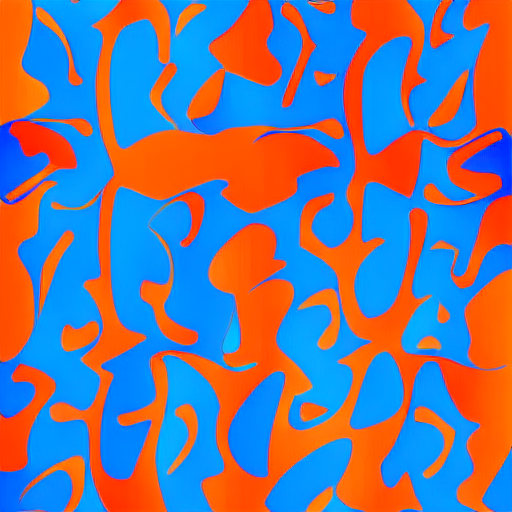

In [7]:
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)